# Titanic Dataset 

Bu veri seti, Titanic gemisinin yolcularıyla ilgili bilgileri içerir. Her bir yolcunun yaş, cinsiyet, sınıf gibi özellikleri ile hayatta kalıp kalmadığı bilgisi bulunur. Bu veri seti, hayatta kalma tahminlerinin sınıflandırma problemlerini çözmek için kullanılacaktır.

# **Kütüphaneler**

In [1]:
# Kütüphaneler

import numpy as np
import pandas as pd
import re as re
import seaborn as sns
import matplotlib.pyplot as plt

# **Veri Setinin Okunması**

In [2]:
df = pd.read_csv('dataset/titanic_dataset.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sütunlar neleri ifade ediyor:

* Survived: Yolcunun hayatta kalıp kalmadığını belirten ikili bir değer (0: Hayatta kalmadı, 1: Hayatta kaldı).
* Pclass: Yolcunun seyahat ettiği sınıfı gösteren kategorik bir değer (1, 2 veya 3).
* Sex: Yolcunun cinsiyetini gösteren kategorik bir değer ("male" veya "female").
* Age: Yolcunun yaşı (sayısal değer, eksik değerler içerebilir).
* Sibsp: Yolcunun gemideki eşi veya kardeş sayısı (sayısal değer).
* Parch: Yolcunun gemideki ebeveyn veya çocuk sayısı (sayısal değer).
* Ticket: Bilet numarası veya kimlik (string değer).
* Fare: Yolcunun ödediği ücret (sayısal değer).
* Cabin: Yolcunun kabin numarası (string değer, eksik değerler içerebilir).
* Embarked: Yolcunun gemiye hangi limandan bindiğini belirten kategorik bir değer (C: Cherbourg, Q: Queenstown, S: Southampton).

# **Veri Seti İçin Keşifsel Veri Analizi (EDA - Exploratory Data Analysis) VE VERİ ÖN İŞLEME**

In [4]:
df.shape # boyutu

(891, 12)

In [5]:
df.info # veriye dair genel bir bilgi 

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
# types of column data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe() # veriye dair özet bilgi
# count: veri sayısı , mean: ortalaması, std: standart sapması, min: minimum değeri, max: maksimum değeri 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df["Age"].describe() # her bir sütun için de ayrıca bakılabilir

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# Survived sütunundaki eşsiz değerler
print(df['Survived'].unique())

[0 1]


In [10]:
df.columns  # sütunları

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.isnull().sum()  # veride eksik değer içeren sütun var mı 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

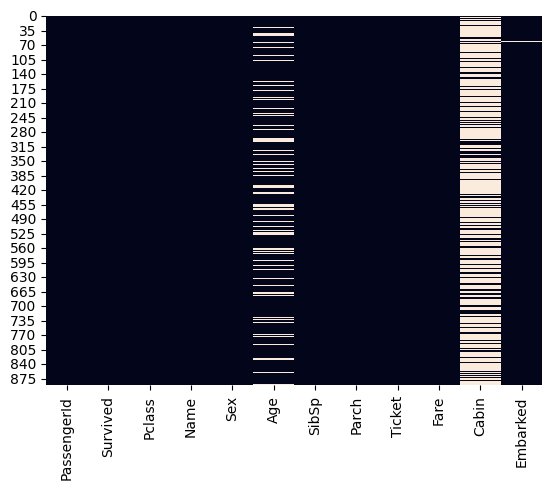

In [12]:
sns.heatmap(df.isnull(), cbar=False)  # eksik verilerin görselleştirilmesi 

**Eksik Değerlerin Doldurulması**

In [13]:
# 'Age' sütunundaki eksik değerler, o sütunun ortalamasıyla doldurulur
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_10016\2263202486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [14]:
# 'Cabin' sütunundaki eksik değerler, en çok tekrar eden değerle doldurulur
most_common_cabin = df['Cabin'].value_counts().idxmax()
df['Cabin'].fillna(most_common_cabin, inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_10016\319100279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(most_common_cabin, inplace=True)


In [15]:
# 'Embarked' sütunundaki eksik değerler, en çok tekrar eden değerle doldurulur
most_common_embarked = df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(most_common_embarked, inplace=True)

C:\Users\havva\AppData\Local\Temp\ipykernel_10016\3983027025.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_common_embarked, inplace=True)


In [16]:
df.isnull().sum()  # eksik değerler tekrar kontrol edilir, artık yok

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**ONE-HOT ENCODING**

Kategorik verileri sayısal verilere dönüştürerek, makine öğrenimi modellerinin bu verileri daha etkin bir şekilde işlemesini sağlar.

In [17]:
# Sex sütunundaki eşsiz değerler
print(df['Sex'].unique())

['male' 'female']


In [18]:
# 'Sex' sütunundaki 'female' ve 'male' değerlerini 0 ve 1'e dönüştürülür
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

C:\Users\havva\AppData\Local\Temp\ipykernel_10016\2238017171.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})


**Korelasyon Matrisi**

Bir veri setindeki sayısal değişkenler arasındaki ilişkileri gösteren bir matristir.

In [19]:
# String ifade içeren sütunlar çıkarılır
numeric_data = df.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

# Korelasyon matrisini hesaplanır
correlation_matrix = numeric_data.corr()  # https://gokerguner.medium.com/machine-learning-4-g%C3%B6zetimsiz-%C3%B6%C4%9Frenme-k%C3%BCmeleme-k-means-algoritmas%C4%B1-boyut-azaltma-temel-44598c53ee0c

print(correlation_matrix)  # 0.1den küçükleri ele 

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.179191  0.091566  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

**Temizlenmiş Verinin Kaydedilmesi**

In [20]:
import pandas as pd
# DataFrame'i CSV dosyasına yazma
df.to_csv('dataset/clean_data_titanic.csv', index=False)

In [21]:
df = pd.read_csv('dataset/clean_data_titanic.csv')

# Veri Setinin Görselleştirilmesi

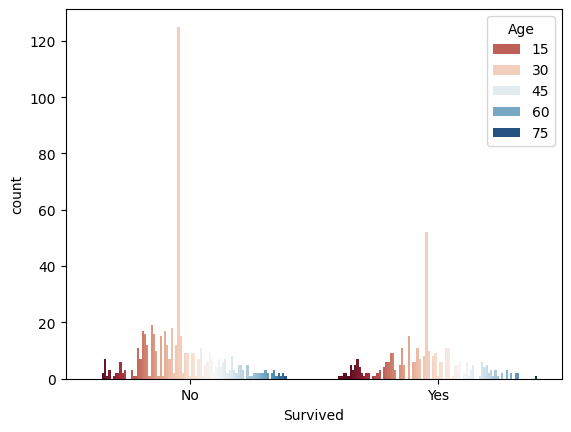

In [22]:
# "Age" sütununa göre, "Survived" yani hayatta kalıp kalmadıklarını gösteren grafik
plt.figure()
sns.countplot(x='Survived', hue='Age', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

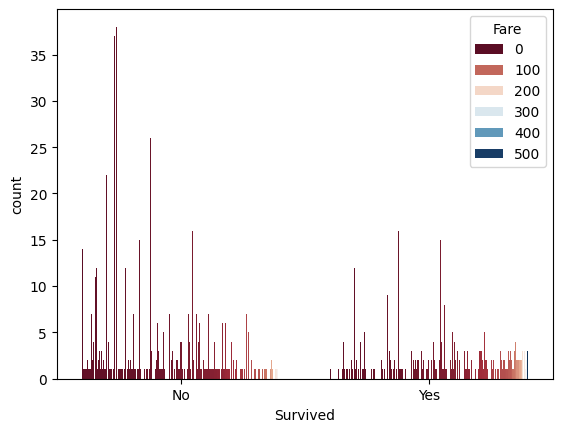

In [23]:
# "Fare" sütununa göre, "Survived" yani hayatta kalıp kalmadıklarını gösteren grafik
plt.figure()
sns.countplot(x='Survived', hue='Fare', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

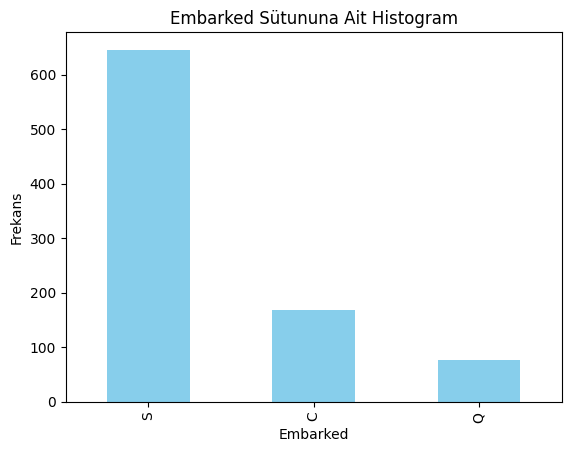

In [24]:
# 'Embarked' sütunundaki benzersiz değerlerin histogramını çiz
df['Embarked'].value_counts().plot(kind='bar', color='skyblue')

# Grafik başlığı ve ekseni etiketlerini ekleyin
plt.title('Embarked Sütununa Ait Histogram')
plt.xlabel('Embarked')
plt.ylabel('Frekans')

# Grafiği göster
plt.show()

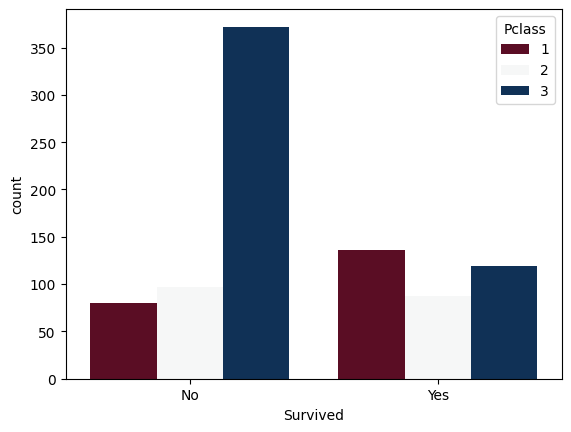

In [25]:
# "Pclass" sütununa göre, "Survived" yani hayatta kalıp kalmadıklarını gösteren grafik
plt.figure()
sns.countplot(x='Survived', hue='Pclass', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

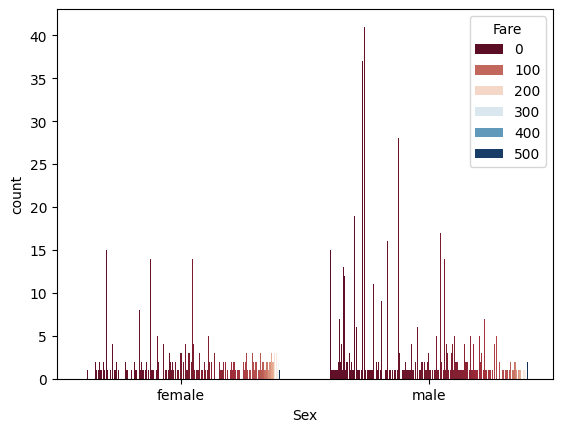

In [26]:
# "Age" sütununa göre, "Sex" yani cinsiyetlerini gösteren  grafik
plt.figure()
sns.countplot(x='Sex', hue='Fare', data=df, palette='RdBu')
plt.xticks([0,1], ['female', 'male'])
plt.show()

# MODELLEME

**Temizlenmiş Veri Üzerinde İşlemeler**

In [27]:
# CSV dosyasını okuma
df = pd.read_csv('dataset/clean_data_titanic.csv')

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
# String ifade içeren sütunlar ve model için gereksiz olduğunu düşünülen sütunlar çıkarılır.
data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [31]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [32]:
data.corr()["Survived"]    # bağımlı değişkenin, diğer değişkenler arasındaki korelasyonuna bakılır

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [33]:
# "Survived" ile korelasyon değeri 0.1 ve -0.1 aralığında olanlar kullanılmayabilir.
data = data.drop(['Parch'],axis=1)

In [34]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [35]:
# Datada ögrenecek sütunları("Survived") ve sonuc sütunları ayrılır
y=data["Survived"].values  # bağımsız değişkenler
X=data.drop("Survived",axis=1).values # bağımlı değişken


# Veri eğitim ve test setleri olarak bölünür
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **RANDOM FOREST SINIFLANDIRMA**

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Modeli oluştur ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
from sklearn.metrics import f1_score
y_pred_rf_randomcv = rf_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_rf_randomcv)

print("Random Forest Sınıflandırma F1 Score:", f1)

Random Forest Sınıflandırma F1 Score: 0.7632850241545893


In [37]:
# Modelin performansını değerlendir
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("Random Forest Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)


Random Forest Sınıflandırma Model Accuracy Score: 0.8171641791044776
Random Forest Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru: 0.8171175695185487


Random Forest Sınıflandırma Confusion Matrix:
[[140  17]
 [ 32  79]]


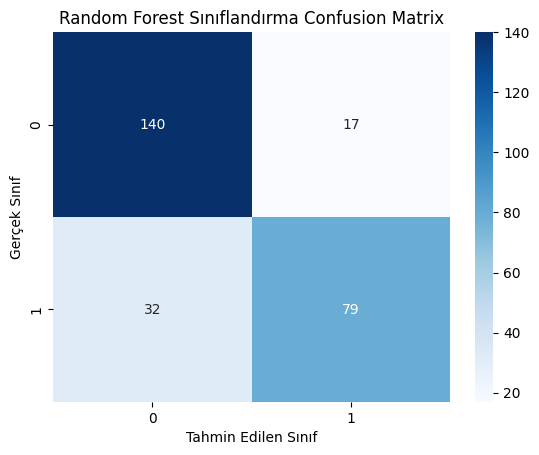

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Random Forest Sınıflandırma Confusion Matrix')
plt.show()

In [62]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = rf_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'Random Forest Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'Random Forest Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


Random Forest Test Örneği 1 İçin Gerçek Etiket:  0.00
Random Forest Test Örneği 1 İçin Tahmini Etiket: 0.00
---
Random Forest Test Örneği 2 İçin Gerçek Etiket:  0.00
Random Forest Test Örneği 2 İçin Tahmini Etiket: 0.00
---
Random Forest Test Örneği 3 İçin Gerçek Etiket:  1.00
Random Forest Test Örneği 3 İçin Tahmini Etiket: 0.00
---
Random Forest Test Örneği 4 İçin Gerçek Etiket:  1.00
Random Forest Test Örneği 4 İçin Tahmini Etiket: 1.00
---
Random Forest Test Örneği 5 İçin Gerçek Etiket:  0.00
Random Forest Test Örneği 5 İçin Tahmini Etiket: 0.00
---


## **RANDOM FOREST SINIFLANDIRMA HPO**

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# RandomizeSearchCV
rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500]}
rf = RandomForestClassifier()
rf_randomcv_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=200, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_randomcv_model.best_params_
print('rf randomcv model accuracy score = {}'.format(rf_randomcv_model.best_score_))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
330 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

rf randomcv model accuracy score = 0.8282580645161289


In [99]:
from sklearn.metrics import f1_score
y_pred_rf_randomcv = rf_randomcv_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_rf_randomcv)

print("HPO ile Random Forest Sınıflandırma F1 Score:", f1)

HPO ile Random Forest Sınıflandırma F1 Score: 0.743455497382199


In [42]:
# Modelin performansını değerlendir
y_pred_rf_randomcv = rf_randomcv_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf_randomcv)
print("HPO ile Random Forest Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(rf_randomcv_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("HPO ile Random Forest Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)


HPO ile Random Forest Sınıflandırma Model Accuracy Score: 0.8171641791044776
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
340 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
360 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
340 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
350 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
305 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
305 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

HPO ile Random Forest Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru: 0.8373046262004896


HPO Random Forest Sınıflandırma Confusion Matrix:
[[148   9]
 [ 40  71]]


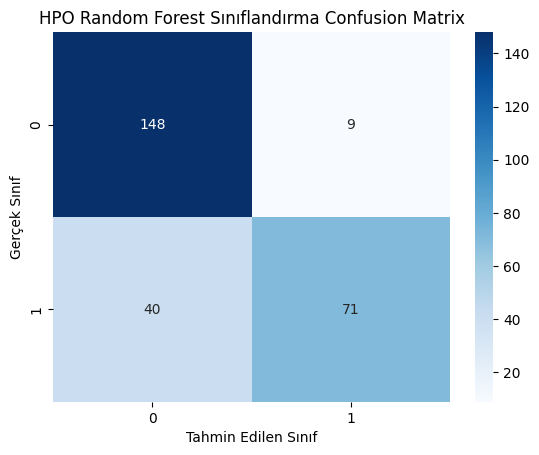

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_rf_randomcv)
print("HPO Random Forest Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('HPO Random Forest Sınıflandırma Confusion Matrix')
plt.show()

In [61]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = rf_randomcv_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'HPO Random Forets Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'HPO Random Forets Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


HPO Random Forets Test Örneği 1 İçin Gerçek Etiket:  0.00
HPO Random Forets Test Örneği 1 İçin Tahmini Etiket: 0.00
---
HPO Random Forets Test Örneği 2 İçin Gerçek Etiket:  0.00
HPO Random Forets Test Örneği 2 İçin Tahmini Etiket: 0.00
---
HPO Random Forets Test Örneği 3 İçin Gerçek Etiket:  1.00
HPO Random Forets Test Örneği 3 İçin Tahmini Etiket: 0.00
---
HPO Random Forets Test Örneği 4 İçin Gerçek Etiket:  1.00
HPO Random Forets Test Örneği 4 İçin Tahmini Etiket: 1.00
---
HPO Random Forets Test Örneği 5 İçin Gerçek Etiket:  0.00
HPO Random Forets Test Örneği 5 İçin Tahmini Etiket: 0.00
---


## **LightGBM SINIFLANDIRMA**

In [ ]:
! pip install lightgbm

In [56]:
import lightgbm as lgb

# LGBMClassifier modeli oluşturulur
lgbm_model = lgb.LGBMClassifier()

# Model eğitilir
lgbm_model.fit(X_train, y_train)

# Modelle tahmin yapılır
y_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [101]:
from sklearn.metrics import f1_score
y_pred_lgbm = lgbm_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_lgbm)

print("LightGBM Sınıflandırma F1 Score:", f1)

LightGBM Sınıflandırma F1 Score: 0.7632850241545893


In [57]:
# Modelin performansını değerlendir
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(lgbm_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("LightGBM Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)


LightGBM Sınıflandırma Model Accuracy Score: 0.8171641791044776
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBM Sınıflandırma Confusion Matrix:
[[140  17]
 [ 32  79]]


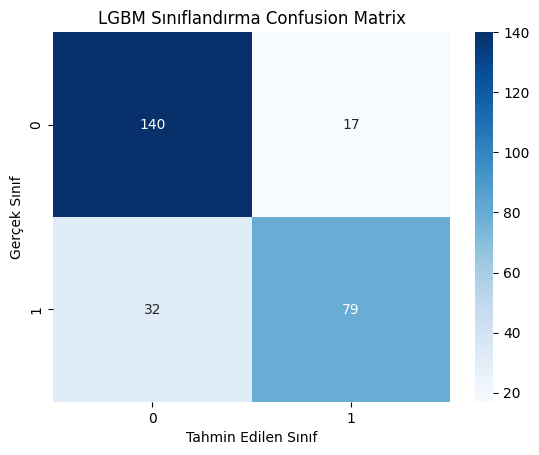

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_lgbm)
print("LGBM Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('LGBM Sınıflandırma Confusion Matrix')
plt.show()

In [60]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = lgbm_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'LGBM Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'LGBM Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


LGBM Test Örneği 1 İçin Gerçek Etiket:  0.00
LGBM Test Örneği 1 İçin Tahmini Etiket: 0.00
---
LGBM Test Örneği 2 İçin Gerçek Etiket:  0.00
LGBM Test Örneği 2 İçin Tahmini Etiket: 0.00
---
LGBM Test Örneği 3 İçin Gerçek Etiket:  1.00
LGBM Test Örneği 3 İçin Tahmini Etiket: 0.00
---
LGBM Test Örneği 4 İçin Gerçek Etiket:  1.00
LGBM Test Örneği 4 İçin Tahmini Etiket: 1.00
---
LGBM Test Örneği 5 İçin Gerçek Etiket:  0.00
LGBM Test Örneği 5 İçin Tahmini Etiket: 1.00
---


## **LGBM SIIFLANDIRMA HPO**

In [63]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# LightGBM için hiperparametre arama alanı belirlenir
lgbm_params = {'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators': [100, 200, 300, 500],
               'max_depth': [3, 5, 7, -1],
               'num_leaves': [20, 30, 40, 50],
               'min_child_samples': [5, 10, 20, 30],
               'subsample': [0.5, 0.7, 0.8, 1.0],
               'colsample_bytree': [0.5, 0.7, 0.8, 1.0]}

# LightGBM modeli oluşturulur
lgbm = LGBMClassifier()

# RandomizeSearchCV modeli oluşturulur ve eğitilir
lgbm_randomcv_model = RandomizedSearchCV(estimator=lgbm,
                                         param_distributions=lgbm_params,
                                         n_iter=10,
                                         cv=5,
                                         scoring='accuracy',
                                         n_jobs=-1,
                                         verbose=2).fit(X_train, y_train)

# En iyi parametreleri gösterir
print('En iyi parametreler:', lgbm_randomcv_model.best_params_)

# En iyi skoru gösterir
print('LightGBM RandomCV model doğruluk skoru:', lgbm_randomcv_model.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [102]:
from sklearn.metrics import f1_score
y_pred_lgbm_randomcv = lgbm_randomcv_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_lgbm_randomcv)

print("HPO ile LGBM Sınıflandırma F1 Score:", f1)

HPO ile LGBM Sınıflandırma F1 Score: 0.76


In [64]:
# Modelin performansını değerlendir
y_pred_lgbm_randomcv = lgbm_randomcv_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lgbm_randomcv)
print("HPO ile LGBM Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(lgbm_randomcv_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("HPO ile LGBM Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)

HPO ile LGBM Sınıflandırma Model Accuracy Score: 0.8208955223880597
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

HPO ile LGBM Sınıflandırma Confusion Matrix:
[[144  13]
 [ 35  76]]


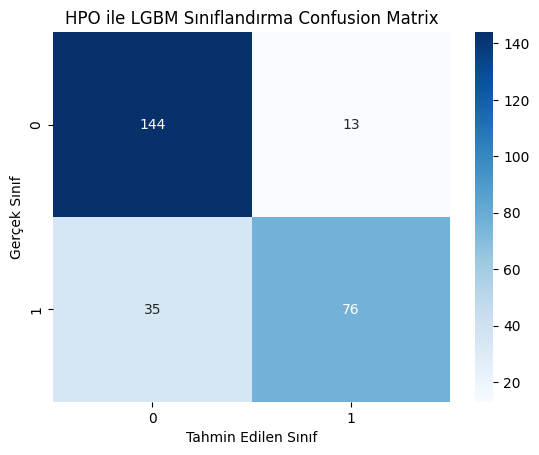

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_lgbm_randomcv)
print("HPO ile LGBM Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('HPO ile LGBM Sınıflandırma Confusion Matrix')
plt.show()

In [66]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = lgbm_randomcv_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'HPO LGBM Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'HPO LGBM Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


HPO LGBM Test Örneği 1 İçin Gerçek Etiket:  0.00
HPO LGBM Test Örneği 1 İçin Tahmini Etiket: 0.00
---
HPO LGBM Test Örneği 2 İçin Gerçek Etiket:  0.00
HPO LGBM Test Örneği 2 İçin Tahmini Etiket: 0.00
---
HPO LGBM Test Örneği 3 İçin Gerçek Etiket:  1.00
HPO LGBM Test Örneği 3 İçin Tahmini Etiket: 0.00
---
HPO LGBM Test Örneği 4 İçin Gerçek Etiket:  1.00
HPO LGBM Test Örneği 4 İçin Tahmini Etiket: 1.00
---
HPO LGBM Test Örneği 5 İçin Gerçek Etiket:  0.00
HPO LGBM Test Örneği 5 İçin Tahmini Etiket: 0.00
---


## **KARAR AĞAÇLARI SINIFLANDIRMA**


In [67]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modeli oluşturulur ve eğitilir
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [104]:
from sklearn.metrics import f1_score
y_pred_dt = dt_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_dt)

print("Karar Ağacı Sınıflandırma F1 Score:", f1)

Karar Ağacı Sınıflandırma F1 Score: 0.6915887850467289


In [68]:
# Modelin performansını değerlendir
y_pred_dt = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Karar Ağacı Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("Karar Ağacı Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)

Karar Ağacı Sınıflandırma Model Accuracy Score: 0.753731343283582
Karar Ağacı Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru: 0.7744837110037036


Karar Ağacı Sınıflandırma Confusion Matrix:
[[128  29]
 [ 37  74]]


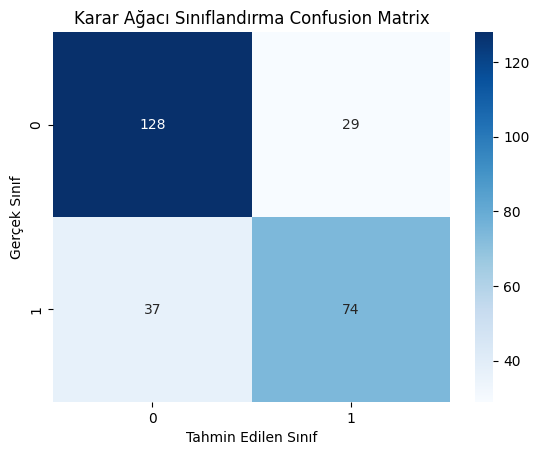

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_dt)
print("Karar Ağacı Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karar Ağacı Sınıflandırma Confusion Matrix')
plt.show()

In [70]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = dt_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'Karar Ağacı Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'Karar Ağacı Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


Karar Ağacı Test Örneği 1 İçin Gerçek Etiket:  0.00
Karar Ağacı Test Örneği 1 İçin Tahmini Etiket: 0.00
---
Karar Ağacı Test Örneği 2 İçin Gerçek Etiket:  0.00
Karar Ağacı Test Örneği 2 İçin Tahmini Etiket: 0.00
---
Karar Ağacı Test Örneği 3 İçin Gerçek Etiket:  1.00
Karar Ağacı Test Örneği 3 İçin Tahmini Etiket: 0.00
---
Karar Ağacı Test Örneği 4 İçin Gerçek Etiket:  1.00
Karar Ağacı Test Örneği 4 İçin Tahmini Etiket: 1.00
---
Karar Ağacı Test Örneği 5 İçin Gerçek Etiket:  0.00
Karar Ağacı Test Örneği 5 İçin Tahmini Etiket: 1.00
---


## **KARAR AĞACI SINIFLANDIRMA HPO**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Karar Ağacı için hiperparametre arama alanı belirlenir
dt_params = {'max_depth': [3, 5, 7, 10, None],
             'min_samples_split': range(2, 11),
             'min_samples_leaf': range(1, 11),
             'max_features': ['auto', 'sqrt', 'log2', None]}

# Karar Ağacı modeli oluşturulur
dt = DecisionTreeClassifier()

# RandomizeSearchCV modeli oluşturulur ve eğitilir
dt_randomcv_model = RandomizedSearchCV(estimator=dt,
                                       param_distributions=dt_params,
                                       n_iter=10,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=2).fit(X_train, y_train)

# En iyi parametreleri gösterir
print('En iyi parametreler:', dt_randomcv_model.best_params_)

# En iyi skoru gösterir
print('Karar Ağacı RandomCV model doğruluk skoru:', dt_randomcv_model.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi parametreler: {'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 3}
Karar Ağacı RandomCV model doğruluk skoru: 0.812141935483871


In [105]:
from sklearn.metrics import f1_score
y_pred_dt_randomcv = dt_randomcv_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_dt_randomcv)

print("HPO ile Karar Ağacı Sınıflandırma F1 Score:", f1)

HPO ile Karar Ağacı Sınıflandırma F1 Score: 0.7536231884057971


In [72]:
# Modelin performansını değerlendir
y_pred_dt_randomcv = dt_randomcv_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt_randomcv)
print("HPO ile Karar Ağacı Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(dt_randomcv_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("HPO ile Karar Ağacı Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)

Karar Ağacı Sınıflandırma Model Accuracy Score: 0.8097014925373134
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Karar Ağacı Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru: 0.8114682066411399


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

HPO ile Karar Ağacı Sınıflandırma Confusion Matrix:
[[139  18]
 [ 33  78]]


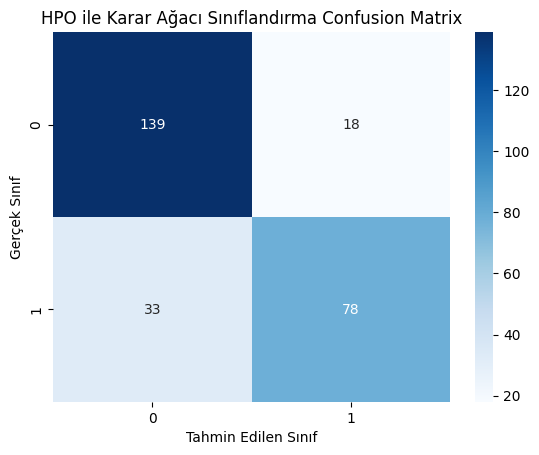

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_dt_randomcv)
print("HPO ile Karar Ağacı Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('HPO ile Karar Ağacı Sınıflandırma Confusion Matrix')
plt.show()

In [79]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = dt_randomcv_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'HPO Karar Ağacı Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'HPO Karar Ağacı Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


HPO Karar Ağacı Test Örneği 1 İçin Gerçek Etiket:  0.00
HPO Karar Ağacı Test Örneği 1 İçin Tahmini Etiket: 0.00
---
HPO Karar Ağacı Test Örneği 2 İçin Gerçek Etiket:  0.00
HPO Karar Ağacı Test Örneği 2 İçin Tahmini Etiket: 0.00
---
HPO Karar Ağacı Test Örneği 3 İçin Gerçek Etiket:  1.00
HPO Karar Ağacı Test Örneği 3 İçin Tahmini Etiket: 0.00
---
HPO Karar Ağacı Test Örneği 4 İçin Gerçek Etiket:  1.00
HPO Karar Ağacı Test Örneği 4 İçin Tahmini Etiket: 1.00
---
HPO Karar Ağacı Test Örneği 5 İçin Gerçek Etiket:  0.00
HPO Karar Ağacı Test Örneği 5 İçin Tahmini Etiket: 1.00
---


## **DESTEK VEKTÖR MAKİNELERİ (SVM) SINIFLANDIRMA (SVC)**

In [80]:
from sklearn.svm import SVC

# SVM modeli oluşturulur ve eğitilir
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [106]:
from sklearn.metrics import f1_score
y_pred_svm = svm_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_svm)

print("SVM Sınıflandırma F1 Score:", f1)

SVM Sınıflandırma F1 Score: 0.38926174496644295


In [81]:
# Modelin performansını değerlendir
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Sınıflandırma Model Accuracy Score:", accuracy)


from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("SVM Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)

SVM Sınıflandırma Model Accuracy Score: 0.6604477611940298
SVM Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru: 0.674615529470843


SVM Sınıflandırma Confusion Matrix:
[[148   9]
 [ 82  29]]


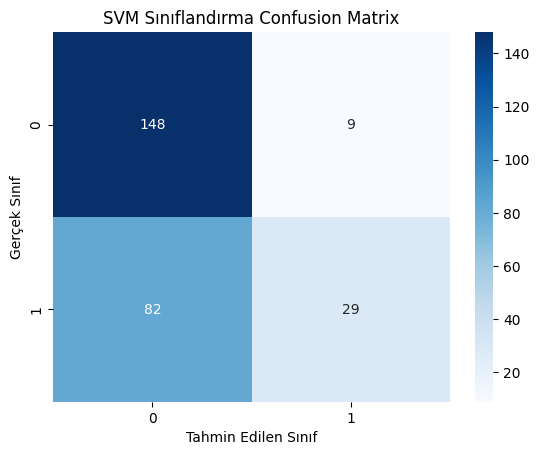

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_svm)
print("SVM Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('SVM Sınıflandırma Confusion Matrix')
plt.show()


In [84]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = svm_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'SVM Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'SVM Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


SVM Test Örneği 1 İçin Gerçek Etiket:  0.00
SVM Test Örneği 1 İçin Tahmini Etiket: 0.00
---
SVM Test Örneği 2 İçin Gerçek Etiket:  0.00
SVM Test Örneği 2 İçin Tahmini Etiket: 0.00
---
SVM Test Örneği 3 İçin Gerçek Etiket:  1.00
SVM Test Örneği 3 İçin Tahmini Etiket: 0.00
---
SVM Test Örneği 4 İçin Gerçek Etiket:  1.00
SVM Test Örneği 4 İçin Tahmini Etiket: 0.00
---
SVM Test Örneği 5 İçin Gerçek Etiket:  0.00
SVM Test Örneği 5 İçin Tahmini Etiket: 0.00
---


## **SVM SINIFLANDIRMA HPO**

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# SVM için hiperparametre arama alanı belirlenir
svm_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# SVM modeli oluşturulur
svm = SVC()

# RandomizeSearchCV modeli oluşturulur ve eğitilir
svm_randomcv_model = RandomizedSearchCV(estimator=svm,
                                        param_distributions=svm_params,
                                        n_iter=10,
                                        cv=5,
                                        scoring='accuracy',
                                        n_jobs=-1,
                                        verbose=2).fit(X_train, y_train)

# En iyi parametreleri gösterir
print('En iyi parametreler:', svm_randomcv_model.best_params_)

# En iyi skoru gösterir
print('SVM RandomCV model doğruluk skoru:', svm_randomcv_model.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi parametreler: {'kernel': 'linear', 'gamma': 1, 'C': 100}
SVM RandomCV model doğruluk skoru: 0.7849677419354839


In [108]:
from sklearn.metrics import f1_score
y_pred_svm_randomcv = svm_randomcv_model.predict(X_test)
# F1 skorunu hesapla
f1 = f1_score(y_test, y_pred_svm_randomcv)

print("SVM Sınıflandırma F1 Score:", f1)

SVM Sınıflandırma F1 Score: 0.7358490566037735


In [107]:
# Modelin performansını değerlendir
y_pred_svm_randomcv = svm_randomcv_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm_randomcv)
print("HPO ile SVM Sınıflandırma Model Accuracy Score:", accuracy)

HPO ile SVM Sınıflandırma Model Accuracy Score: 0.7910447761194029


In [ ]:
# Yaklaşık 5 saat çalışmasına rağmen tamamlanmadı. 
 
from sklearn.model_selection import cross_val_score
# Modelin 5 kat çapraz doğrulama ile doğruluk skorunu hesaplayın
cv_accuracy = cross_val_score(svm_randomcv_model, X, y, cv=5, scoring='accuracy')
# Doğruluk skorlarının ortalamasını alın
mean_accuracy = cv_accuracy.mean()
# Sonucu ekrana yazdırın
print("HPO ile SVM Sınıflandırma 5 Kat Çapraz Doğrulama Doğruluk Skoru:", mean_accuracy)

HPO ile SVC Sınıflandırma Confusion Matrix:
[[134  23]
 [ 33  78]]


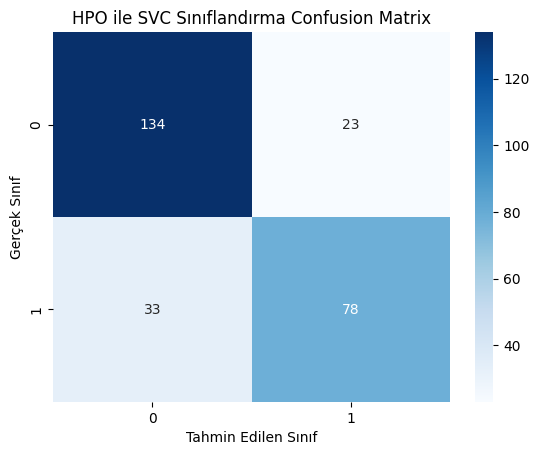

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_svm_randomcv)
print("HPO ile SVC Sınıflandırma Confusion Matrix:")
print(cm)
# Heatmap olarak confusion matrix'i görselleştir
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('HPO ile SVC Sınıflandırma Confusion Matrix')
plt.show()


In [89]:
rastgele_test_ornekleri = X_test[:5]
tahmin_survived = svm_randomcv_model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_survived)):
    gercek_etiket = y_test[rastgele_test_indeksleri[i]]  # İlgili indeks kullanarak gerçek etiket alınır
    tahmin_etiket = tahmin_survived[i]

    print(f'HPO SVM Test Örneği {i + 1} İçin Gerçek Etiket:  {gercek_etiket:.2f}')
    print(f'HPO SVM Test Örneği {i + 1} İçin Tahmini Etiket: {tahmin_etiket:.2f}')
    print('---')


HPO SVM Test Örneği 1 İçin Gerçek Etiket:  0.00
HPO SVM Test Örneği 1 İçin Tahmini Etiket: 0.00
---
HPO SVM Test Örneği 2 İçin Gerçek Etiket:  0.00
HPO SVM Test Örneği 2 İçin Tahmini Etiket: 0.00
---
HPO SVM Test Örneği 3 İçin Gerçek Etiket:  1.00
HPO SVM Test Örneği 3 İçin Tahmini Etiket: 0.00
---
HPO SVM Test Örneği 4 İçin Gerçek Etiket:  1.00
HPO SVM Test Örneği 4 İçin Tahmini Etiket: 1.00
---
HPO SVM Test Örneği 5 İçin Gerçek Etiket:  0.00
HPO SVM Test Örneği 5 İçin Tahmini Etiket: 1.00
---
